In [14]:
#!pip install citipy

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

## Perform API Calls

In [17]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="


In [18]:
lat = []
temp = []
city_name = []
country = []
humidity = []
cloudiness = []
windspeed = []

print("Data Retrieval")

row_count = 0


for city in cities:
    query_url = url + city
    response = requests.get(query_url).json()
    if response["cod"] == "404":
        print("No city record found.")
    else:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
    
    print("-------------------------------------------------------------------------------")
    try:
        print("Processing: Record # " , row_count, ' | ' , response["name"],',', response['sys']['country'],'|' , response["id"])
        print(query_url)
    except KeyError: 
        print("Processing: Record # " , row_count, ' | ' , " City name not found (N/A)")
        print(query_url)
        
    
    row_count += 1
    
print("-------------------------------------------------------------------------------")    
print("Data Retrieval Complete")
print("-------------------------------------------------------------------------------")

Data Retrieval
-------------------------------------------------------------------------------
Processing: Record #  0  |  Muros , ES | 3115824
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=muros
-------------------------------------------------------------------------------
Processing: Record #  1  |  Mar del Plata , AR | 3863379
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=mar del plata
-------------------------------------------------------------------------------
Processing: Record #  2  |  Yulara , AU | 6355222
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=yulara
-------------------------------------------------------------------------------
Processing: Record #  3  |  Te Anau , NZ | 2181625
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=te anau
-----------

-------------------------------------------------------------------------------
Processing: Record #  37  |  Iqaluit , CA | 5983720
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=iqaluit
-------------------------------------------------------------------------------
Processing: Record #  38  |  Ushuaia , AR | 3833367
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=ushuaia
-------------------------------------------------------------------------------
Processing: Record #  39  |  Hasaki , JP | 2112802
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=hasaki
-------------------------------------------------------------------------------
Processing: Record #  40  |  Lavrentiya , RU | 4031637
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=lavrentiya
------------------------

-------------------------------------------------------------------------------
Processing: Record #  71  |  Ilulissat , GL | 3423146
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=ilulissat
-------------------------------------------------------------------------------
Processing: Record #  72  |  Busselton , AU | 2075265
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=busselton
No city record found.
-------------------------------------------------------------------------------
Processing: Record #  73  |   City name not found (N/A)
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=illoqqortoormiut
-------------------------------------------------------------------------------
Processing: Record #  74  |  Torbay , CA | 6167817
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d1

-------------------------------------------------------------------------------
Processing: Record #  104  |  Aksu , KZ | 1524298
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=aksu
-------------------------------------------------------------------------------
Processing: Record #  105  |  Goundam , ML | 2456917
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=goundam
No city record found.
-------------------------------------------------------------------------------
Processing: Record #  106  |   City name not found (N/A)
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=gurskoye
-------------------------------------------------------------------------------
Processing: Record #  107  |  Honiara , SB | 2108502
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=honiara
---

-------------------------------------------------------------------------------
Processing: Record #  138  |  Mingaora , PK | 1170395
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=mingaora
-------------------------------------------------------------------------------
Processing: Record #  139  |  Butaritari , KI | 2110227
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=butaritari
-------------------------------------------------------------------------------
Processing: Record #  140  |  Teguldet , RU | 1489822
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=teguldet
-------------------------------------------------------------------------------
Processing: Record #  141  |  Kavieng , PG | 2094342
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=kavieng
--------------

-------------------------------------------------------------------------------
Processing: Record #  172  |  Prudentopolis , BR | 3452216
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=prudentopolis
-------------------------------------------------------------------------------
Processing: Record #  173  |  Kenai , US | 5866063
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=kenai
-------------------------------------------------------------------------------
Processing: Record #  174  |  Bambous Virieux , MU | 1106677
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=bambous virieux
-------------------------------------------------------------------------------
Processing: Record #  175  |  Port Hueneme , US | 5384339
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=por

-------------------------------------------------------------------------------
Processing: Record #  206  |  Leningradskiy , RU | 2123814
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=leningradskiy
-------------------------------------------------------------------------------
Processing: Record #  207  |  Ribeira Grande , PT | 3372707
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=ribeira grande
-------------------------------------------------------------------------------
Processing: Record #  208  |  Castro , CL | 3896218
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=castro
-------------------------------------------------------------------------------
Processing: Record #  209  |  Hammelburg , DE | 2911214
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=hamme

-------------------------------------------------------------------------------
Processing: Record #  241  |  Cumberland , US | 5221703
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=cumberland
-------------------------------------------------------------------------------
Processing: Record #  242  |  Kaberamaido , UG | 233019
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=kaberamaido
-------------------------------------------------------------------------------
Processing: Record #  243  |  Rio Gallegos , AR | 3838859
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=rio gallegos
-------------------------------------------------------------------------------
Processing: Record #  244  |  Bulgan , MN | 2032201
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=bulgan
---

-------------------------------------------------------------------------------
Processing: Record #  277  |  Luena , AO | 3347719
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=luena
No city record found.
-------------------------------------------------------------------------------
Processing: Record #  278  |   City name not found (N/A)
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=sorvag
-------------------------------------------------------------------------------
Processing: Record #  279  |  Mutoko , ZW | 884927
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=mutoko
-------------------------------------------------------------------------------
Processing: Record #  280  |  Jalalabad , AF | 1139715
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=jalalabad
--

-------------------------------------------------------------------------------
Processing: Record #  312  |  Kulti , IN | 1265711
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=kulti
-------------------------------------------------------------------------------
Processing: Record #  313  |  Buraydah , SA | 107304
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=buraydah
-------------------------------------------------------------------------------
Processing: Record #  314  |  Georgetown , GY | 3378644
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=georgetown
-------------------------------------------------------------------------------
Processing: Record #  315  |  Kununurra , AU | 2068110
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=kununurra
No city record fo

-------------------------------------------------------------------------------
Processing: Record #  347  |  Chester , GB | 2653228
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=chester
-------------------------------------------------------------------------------
Processing: Record #  348  |  Williamsburg , US | 4793846
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=williamsburg
-------------------------------------------------------------------------------
Processing: Record #  349  |  Sehithwa , BW | 933109
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=sehithwa
-------------------------------------------------------------------------------
Processing: Record #  350  |  Nantucket , US | 4944903
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=nantucket
---------

-------------------------------------------------------------------------------
Processing: Record #  382  |  Bonthe , SL | 2409914
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=bonthe
-------------------------------------------------------------------------------
Processing: Record #  383  |  Montrose , AU | 2157161
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=montrose
-------------------------------------------------------------------------------
Processing: Record #  384  |  Alpena , US | 4984075
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=alpena
No city record found.
-------------------------------------------------------------------------------
Processing: Record #  385  |   City name not found (N/A)
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=yanan
--

-------------------------------------------------------------------------------
Processing: Record #  416  |  Qazvin , IR | 119505
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=qazvin
-------------------------------------------------------------------------------
Processing: Record #  417  |  Vilhena , BR | 3924679
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=vilhena
-------------------------------------------------------------------------------
Processing: Record #  418  |  Alto Araguaia , BR | 3472473
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=alto araguaia
-------------------------------------------------------------------------------
Processing: Record #  419  |  Chapais , CA | 5919850
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=chapais
---------------

-------------------------------------------------------------------------------
Processing: Record #  449  |  Tevaitoa , PF | 4033375
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=tevaitoa
-------------------------------------------------------------------------------
Processing: Record #  450  |  Riyadh , SA | 108410
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=riyadh
-------------------------------------------------------------------------------
Processing: Record #  451  |  Abdulino , RU | 584471
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=abdulino
-------------------------------------------------------------------------------
Processing: Record #  452  |  Chicama , PE | 3698359
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=chicama
------------------------

-------------------------------------------------------------------------------
Processing: Record #  482  |  Tocopilla , CL | 3869716
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=tocopilla
-------------------------------------------------------------------------------
Processing: Record #  483  |  Tabou , CI | 2281120
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=tabou
-------------------------------------------------------------------------------
Processing: Record #  484  |  Ilhabela , BR | 3461425
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=ilhabela
No city record found.
-------------------------------------------------------------------------------
Processing: Record #  485  |   City name not found (N/A)
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=rung

-------------------------------------------------------------------------------
Processing: Record #  516  |  Cockburn Town , TC | 3576994
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=cockburn town
-------------------------------------------------------------------------------
Processing: Record #  517  |  Beaverlodge , CA | 5896969
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=beaverlodge
-------------------------------------------------------------------------------
Processing: Record #  518  |  Mutis , CO | 3689325
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=mutis
-------------------------------------------------------------------------------
Processing: Record #  519  |  Kuching , MY | 1735634
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=kuching
--------

-------------------------------------------------------------------------------
Processing: Record #  550  |  America Dourada , BR | 3472344
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=america dourada
-------------------------------------------------------------------------------
Processing: Record #  551  |  Constitucion , MX | 4011743
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=constitucion
-------------------------------------------------------------------------------
Processing: Record #  552  |  Mackay , CA | 5921525
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=mackay
-------------------------------------------------------------------------------
Processing: Record #  553  |  Ola , RU | 2122574
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=ola
No city 

-------------------------------------------------------------------------------
Processing: Record #  585  |  Olenino , RU | 515687
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=olenino
No city record found.
-------------------------------------------------------------------------------
Processing: Record #  586  |   City name not found (N/A)
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=tarudant
-------------------------------------------------------------------------------
Processing: Record #  587  |  Karpogory , RU | 552256
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=karpogory
-------------------------------------------------------------------------------
Processing: Record #  588  |  La Joya , MX | 3526617
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f39cc686b8b2767cd7e816de10d16c0&q=la 

In [38]:
weather = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Temperature (F)": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed
}

weather_data = pd.DataFrame(weather)
weather_data.count()

City               547
Cloudiness         547
Country            547
Humidity           547
Latitude           547
Temperature (F)    547
Wind Speed         547
dtype: int64

In [20]:
weather_data.head()

,City,Cloudiness,Country,Humidity,Latitude,Temperature (F),WindSpeed
0,Muros,75,ES,93,42.77,62.60,1.12
1,Mar del Plata,0,AR,99,-46.43,31.71,2.82
2,Yulara,0,AU,52,-25.24,41.00,4.70
3,Te Anau,64,NZ,84,-45.41,37.56,5.73
4,Cape Town,0,ZA,71,-33.93,50.00,4.70


In [21]:
weather_data.to_csv("City Data.csv")

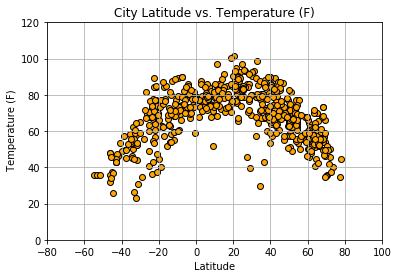

In [44]:
plt.scatter(weather_data["Latitude"],weather_data["Temperature (F)"], 
            c = "orange", edgecolor = "black", linewidths = 1, marker = "o", alpha = 1,)


plt.title(f"City Latitude vs. Temperature (F)")      
plt.ylabel(" Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 120])


plt.savefig("Latitude vs. Temperature.png")


plt.show()


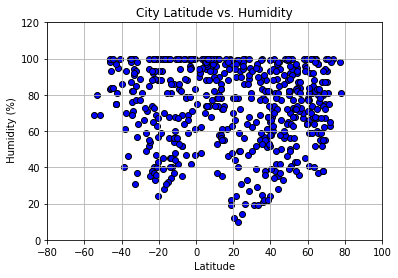

In [40]:
plt.scatter(weather_data["Latitude"],weather_data["Humidity"], 
            c = "blue", edgecolor = "black", linewidths = 1, marker = "o", alpha = 1,)


plt.title(f"City Latitude vs. Humidity")      
plt.ylabel(" Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 120])


plt.savefig("Latitude vs. Humidity.png")


plt.show()

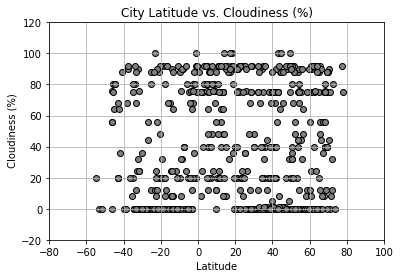

In [41]:
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"], 
            c = "gray", edgecolor = "black", linewidths = 1, marker = "o", alpha = 1,)


plt.title(f"City Latitude vs. Cloudiness (%)")      
plt.ylabel(" Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])


plt.savefig("Latitude vs. Cloudiness.png")


plt.show()

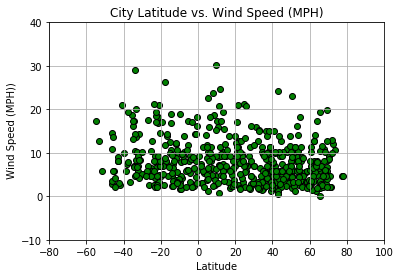

In [42]:
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"], 
            c = "green", edgecolor = "black", linewidths = 1, marker = "o", alpha = 1,)


plt.title(f"City Latitude vs. Wind Speed (MPH)")      
plt.ylabel(" Wind Speed (MPH))")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 40])


plt.savefig("Latitude vs. Wind Speed (MPH).png")


plt.show()

In [49]:
a = """1. In the temperature chart it there is a correlation between proximity to the equator
, which is at 0 Degrees Latitude, and higher temperature.  This evidence confirms that the temepratures are hotter
near the equator.  Also there is evidence that it is summer for the cities in the northern hemisphere as you
can see there is an abundance of plots with higher temperatures in the 0-40 Degree Latitude area."""
b = """2. There is almost no apparent correlation between Latitude vs Wind Speed or Cloudiness in the northern
or southern hemisphere, in both charts there is no patterns in the data.""" 
c = """3. Finally there is some data in the Humidity chart that suggest
the northern hemipshere is experiencing more humidity compared to those cities in the souther hemisphere
This could be due to the fact the warm air holds more moisture than cool air and 
the northern hemisphere is experienceing summer, which is the result of more humidity in the northern hemisphere."""


print("WeatherPy Analysis")
print("-------------------------------------------------------------------------------")
print(a)
print("-------------------------------------------------------------------------------")
print(b)
print("-------------------------------------------------------------------------------")
print(c)

WeatherPy Analysis
-------------------------------------------------------------------------------
1. In the temperature chart it there is a correlation between proximity to the equator
, which is at 0 Degrees Latitude, and higher temperature.  This evidence confirms that the temepratures are hotter
near the equator.  Also there is evidence that it is summer for the cities in the northern hemisphere as you
can see there is an abundance of plots with higher temperatures in the 0-40 Degree Latitude area.
-------------------------------------------------------------------------------
2. There is almost no apparent correlation between Latitude vs Wind Speed or Cloudiness in the northern
or southern hemisphere, in both charts there is no patterns in the data.
-------------------------------------------------------------------------------
3. Finally there is some data in the Humidity chart that suggest
the northern hemipshere is experiencing more humidity compared to those cities in the sout